In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from algs.minmaxopt import NaiveGDA, OptimiticGDA, ExtraGradientGDA

### Minimax Optimization Notebook

We consider problems of the form : 
$$
\max_{x \in X} \min_{y\in Y} f(x,y) ~~~~ (L)
$$
When the objective $f:X \times Y \rightarrow \mathbb{R}$ is of the form :
$$
f(x,y) = x^T A y,
$$
, where $A$ is full-rank, we say that it is **bilinear**. When the objective $f:X \times Y \rightarrow \mathbb{R}$ satisfies for fixed $x\in X$ and $\forall y \in Y$:
$$
f(x,y_1 \cdot \gamma + y_2 \cdot (1 - \gamma)) \geq \gamma f(x,y_1) \cdot  (1 - \gamma) f(x,y_2),
$$
and for fixed $y\in Y$ and $\forall x \in X$:
$$
f(x_1 \cdot \gamma + x_2 \cdot (1 - \gamma),y) \leq \gamma f(x_1,y) \cdot  (1 - \gamma) f(x_2,y),
$$
then we say it is **concave-convex**.

In [3]:
def plot_scalar_field(ax,fun,lims = [-3,3,-3,3], n=256, cmap = cm.hot):
    n = 256 
    x = jnp.linspace(lims[0], lims[1], n) 
    y = jnp.linspace(lims[2], lims[3], n) 
    X, Y = jnp.meshgrid(x, y) 
    Z = fun(X,Y)
    ax.pcolormesh(X, Y, Z, cmap = cmap) 
    ax.set_aspect('equal', 'box')

#### Minimal 2-d example

Let us define the bilinear function $f: \mathbb{R}^1 \times \mathbb{R}^1 \rightarrow \mathbb{R}$: 
$$
f(x,y) = xy,
$$
it is an extremely simple bilinear form where $A = [1]$. We will try to run and visualize our algorithms on it. We also define a concave-convex function 
$$
g(x,y) = xy + x^2 - y^2
$$
on which we will also run our algorithms.

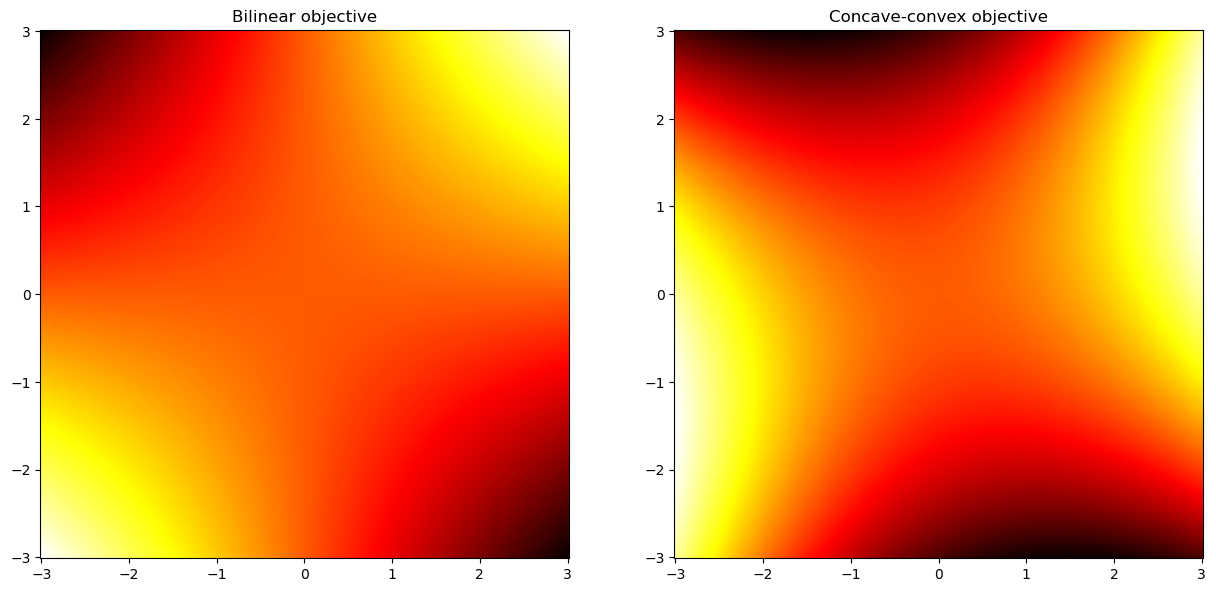

In [4]:
@jax.jit
def simple_bilinear_objective(x,y):
    return x * y

@jax.jit
def simple_concave_convex_objective(x,y):
    return x*y + x**2 - y**2

"""plot the function"""
s=15
_, ax = plt.subplots(1,2,figsize=(1*s,2*s)); 
plot_scalar_field(ax[0],simple_bilinear_objective); ax[0].set_title('Bilinear objective')
plot_scalar_field(ax[1],simple_concave_convex_objective); ax[1].set_title('Concave-convex objective')
plt.show() 

#### GDA, EGDA and OGDA examples

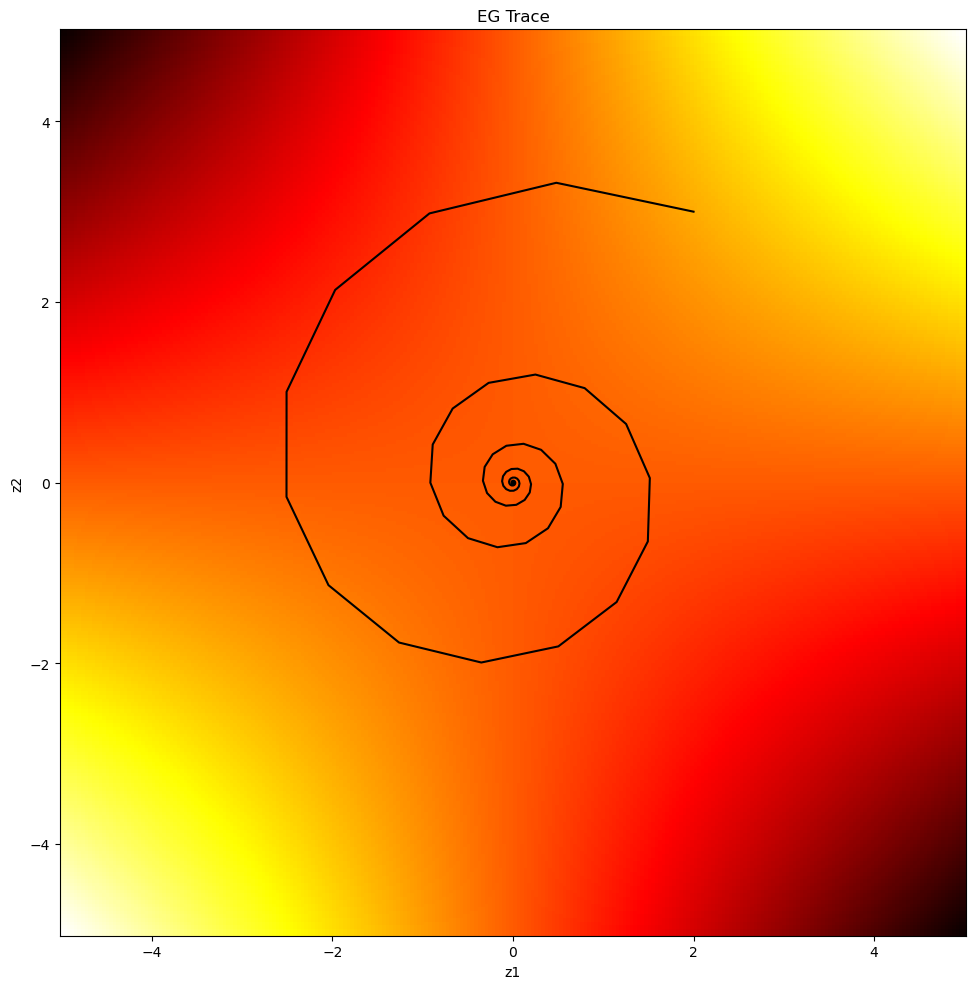

In [8]:
sz = 10
fig, ax = plt.subplots(1,1,figsize = (sz,sz))

""" Solving with GDA """
lim = 5.
x = 2.; y = 3.;
xs,ys,fs = ExtraGradientGDA.solve(simple_bilinear_objective,x,y,100,0.4,1.)

""" Nice little plot to see in all 
details how the algorithm miserably fails """
plot_scalar_field(ax,simple_bilinear_objective,lims=[-lim,lim,-lim,lim]); 
ax.plot(xs,ys,color='k')
ax.set_title('EG Trace')
ax.set_xlabel('z1')
ax.set_ylabel('z2')
# ax[1].plot(fs) ; ax[1].set_aspect(2.6)
# ax[1].set_title('GDA obj')
# ax[1].set_xlabel('steps')
# ax[1].set_ylabel('f(z(t))')

fig.tight_layout(); plt.show() # display the plots

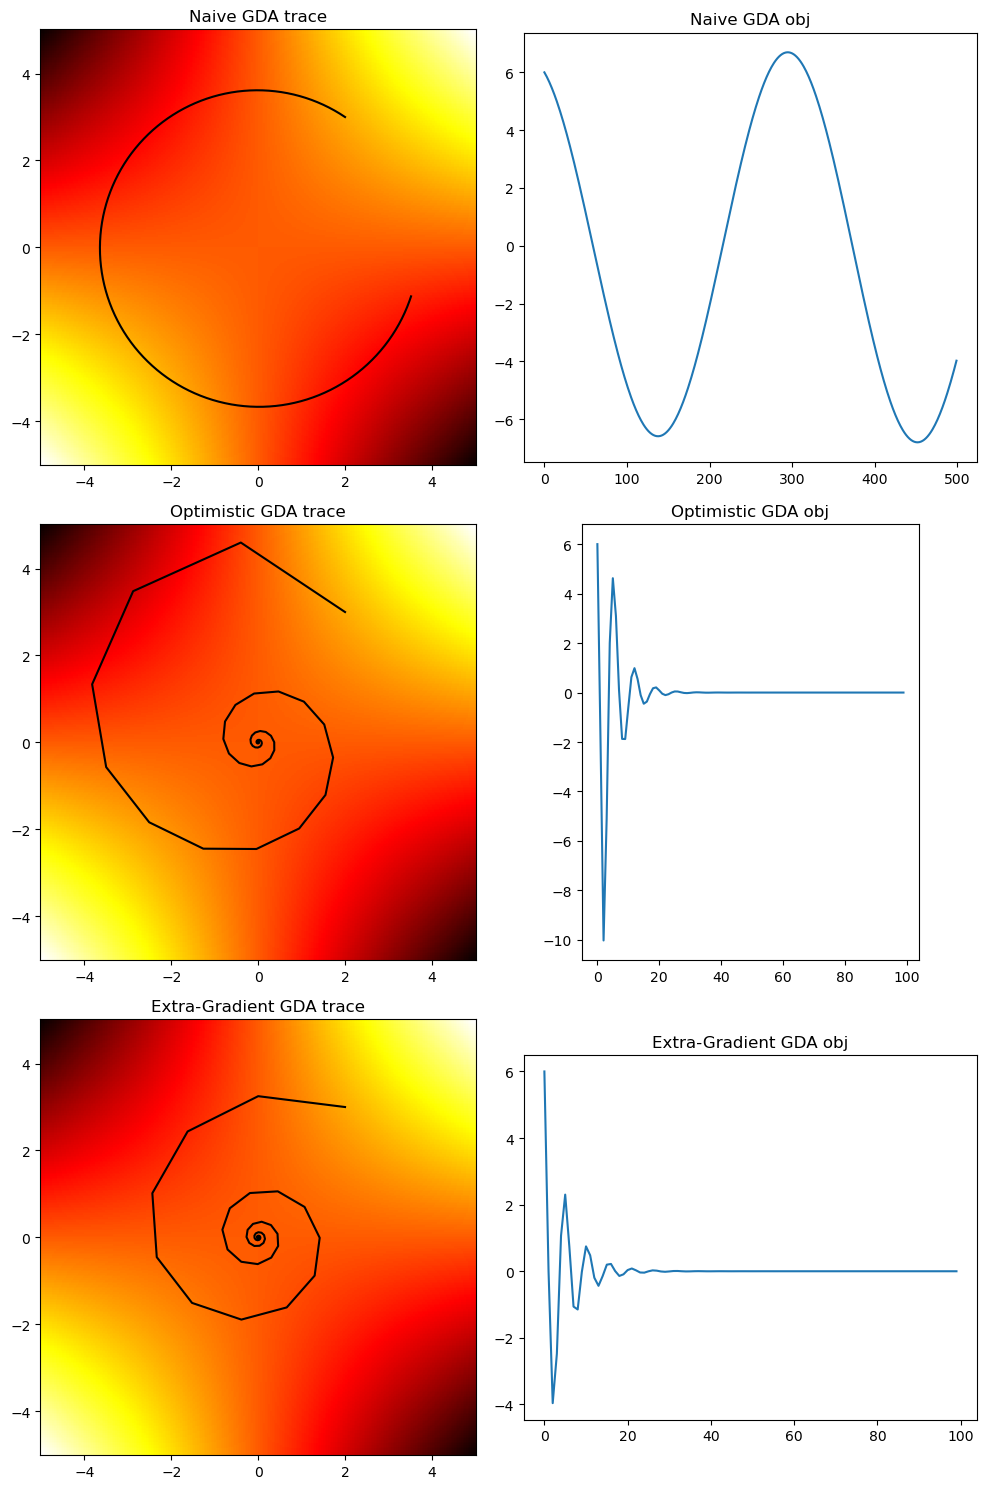

In [11]:
sz = 5
fig, ax = plt.subplots(3,2,figsize = (2*sz,3*sz))

""" Solving with GDA """
x = 2.; y = 3.;
xs,ys,fs = NaiveGDA.solve(simple_bilinear_objective,x,y,500,0.01,1.)

""" Nice little plot to see in all 
details how the algorithm miserably fails """
plot_scalar_field(ax[0,0],simple_bilinear_objective,lims=[-5,5,-5,5]); 
ax[0,0].plot(xs,ys,color='k')
ax[0,1].plot(fs) ; ax[0,1].set_aspect(35)
ax[0,0].set_title('Naive GDA trace')
ax[0,1].set_title('Naive GDA obj')

""" Solving with Optimistic GDA """
x = 2.; y = 3.;
xs,ys,fs = OptimiticGDA.solve(simple_bilinear_objective,x,y,100,0.4,1.)

""" Nice little plot to see in all 
details how the algorithm miserably fails """
plot_scalar_field(ax[1,0],simple_bilinear_objective,lims=[-5,5,-5,5])
ax[1,0].plot(xs,ys,color='k')
ax[1,1].plot(fs) ; ax[1,1].set_aspect(8)
ax[1,0].set_title('Optimistic GDA trace')
ax[1,1].set_title('Optimistic GDA obj')

""" Solving with Extra-Gradient GDA """
x = 2.; y = 3.;
xs,ys,fs = ExtraGradientGDA.solve(simple_bilinear_objective,x,y,100,0.5,1.)

""" Nice little plot to see in all 
details how the algorithm miserably fails """
plot_scalar_field(ax[2,0],simple_bilinear_objective,lims=[-5,5,-5,5])
ax[2,0].plot(xs,ys,color='k')
ax[2,1].plot(fs) ; ax[2,1].set_aspect(8); 
ax[2,0].set_title('Extra-Gradient GDA trace')
ax[2,1].set_title('Extra-Gradient GDA obj')

fig.tight_layout(); plt.show() # display the plots

### Comparing the convergence rates

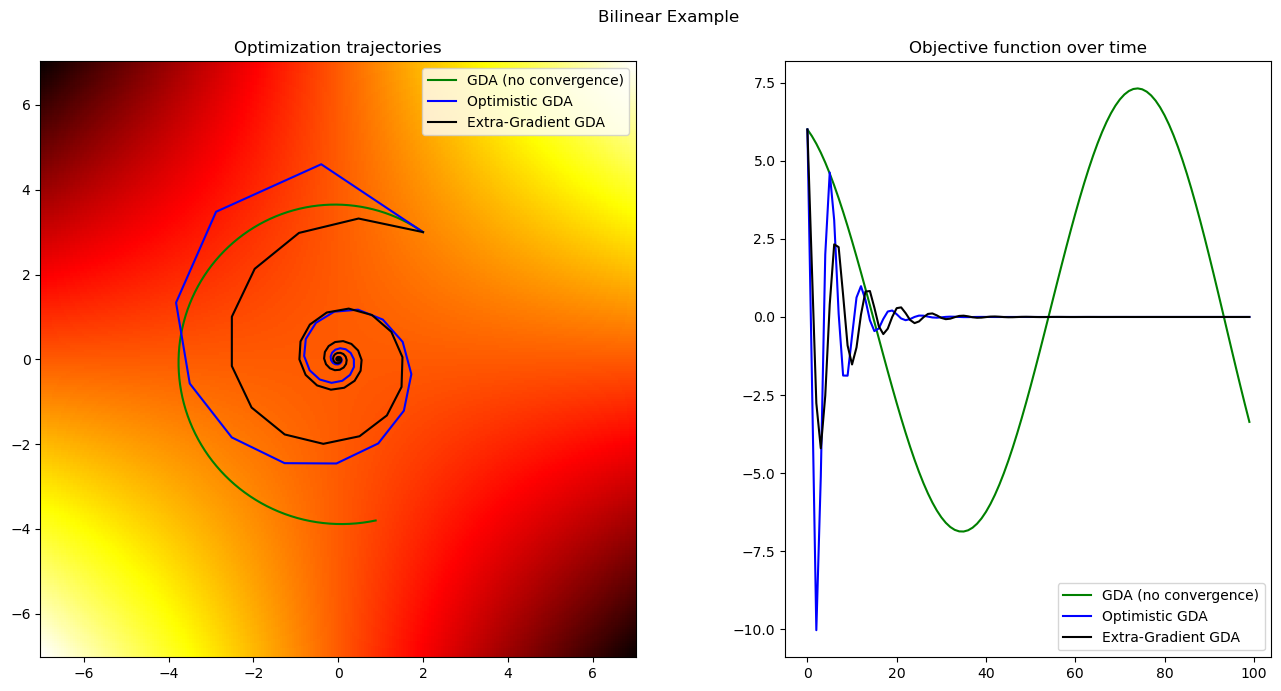

In [45]:
sz = 7
fig, ax = plt.subplots(1,2, figsize=(2*sz,sz)); plot_scalar_field(ax[0],simple_bilinear_objective,lims=[-7,7,-7,7]); 

x = 2.; y = 3.;
xs,ys,fs = NaiveGDA.solve(simple_bilinear_objective,x,y,100,0.04,1.)
ax[0].plot(xs,ys,color='g')
ax[1].plot(fs, color='g') ; 

x = 2.; y = 3.;
xs,ys,fs = OptimiticGDA.solve(simple_bilinear_objective,x,y,100,0.4,1.)
ax[0].plot(xs,ys,color='b')
ax[1].plot(fs, color='b') ; 

x = 2.; y = 3.;
xs,ys,fs = ExtraGradientGDA.solve(simple_bilinear_objective,x,y,100,0.4,1.)
ax[0].plot(xs,ys,color='k')
ax[1].plot(fs,color='k') ;

ax[1].set_aspect(7); 

ax[0].set_title('Optimization trajectories')
ax[0].legend(['GDA (no convergence)','Optimistic GDA','Extra-Gradient GDA'])
ax[1].legend(['GDA (no convergence)','Optimistic GDA','Extra-Gradient GDA'])
ax[1].set_title('Objective function over time')
fig.suptitle('Bilinear Example')
fig.tight_layout(); plt.show() # plot the function

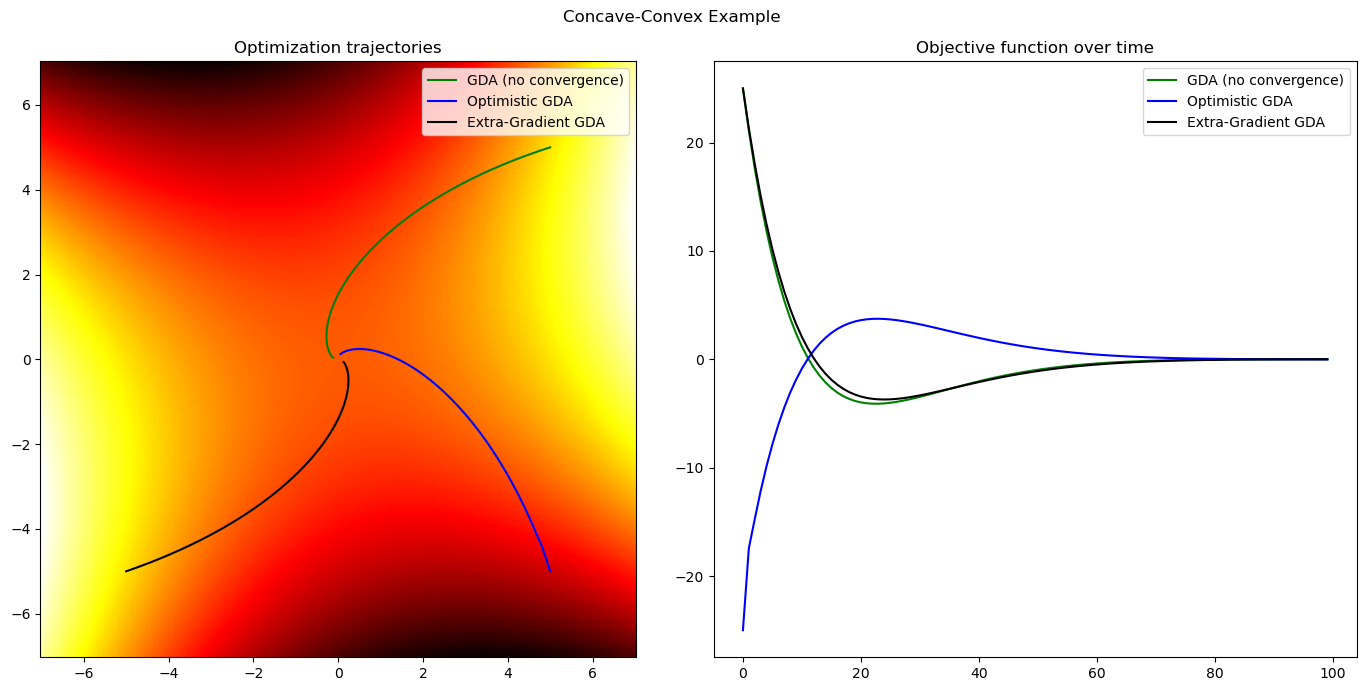

In [51]:
sz = 7
fig, ax = plt.subplots(1,2, figsize=(2*sz,sz)); plot_scalar_field(ax[0],simple_concave_convex_objective,lims=[-7,7,-7,7]); 

x = 5.; y = 5.;
xs,ys,fs = NaiveGDA.solve(simple_concave_convex_objective,x,y,100,0.02,1.)
ax[0].plot(xs,ys,color='g')
ax[1].plot(fs, color='g') ; 

x = 5.; y = -5.;
xs,ys,fs = OptimiticGDA.solve(simple_concave_convex_objective,x,y,100,0.02,1.)
ax[0].plot(xs,ys,color='b')
ax[1].plot(fs, color='b') ; 

x = -5.; y = -5.;
xs,ys,fs = ExtraGradientGDA.solve(simple_concave_convex_objective,x,y,100,0.02,1.)
ax[0].plot(xs,ys,color='k')
ax[1].plot(fs,color='k') ;

ax[0].set_title('Optimization trajectories')
ax[0].legend(['GDA (no convergence)','Optimistic GDA','Extra-Gradient GDA'])
ax[1].legend(['GDA (no convergence)','Optimistic GDA','Extra-Gradient GDA'])
ax[1].set_title('Objective function over time')
fig.suptitle('Concave-Convex Example')
fig.tight_layout(); plt.show() # plot the function

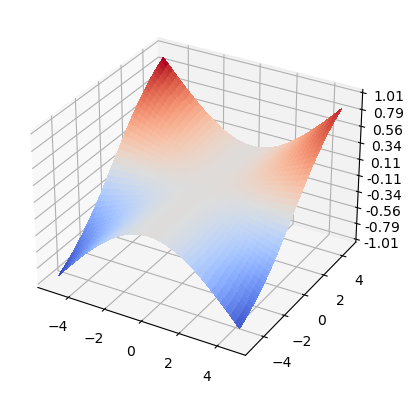

In [36]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = (X**2+Y**2)**0.5
Z = ((X**2)*Y)*(1+R)**-1*0.06

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()